In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [96]:
df = pd.read_csv("movies.csv")
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [97]:
df.shape

(659969, 20)

In [98]:
df.isnull().sum().sort_values(ascending = False)

recommendations         623223
tagline                 564770
keywords                474588
backdrop_path           469900
production_companies    362431
credits                 217830
genres                  204735
poster_path             186232
overview                111105
release_date             52517
runtime                  35462
title                        2
status                       0
vote_average                 0
vote_count                   0
revenue                      0
budget                       0
popularity                   0
original_language            0
id                           0
dtype: int64

In [99]:
df = df.dropna(subset=['release_date', 'title'])

In [100]:
df.isnull().sum().sort_values(ascending = False)

recommendations         570705
tagline                 518517
keywords                426030
backdrop_path           421325
production_companies    316642
credits                 180480
genres                  166861
poster_path             155966
overview                 98011
runtime                  28695
title                        0
status                       0
revenue                      0
vote_average                 0
vote_count                   0
budget                       0
release_date                 0
popularity                   0
original_language            0
id                           0
dtype: int64

In [101]:
df.shape

(607451, 20)

<AxesSubplot:ylabel='genres'>

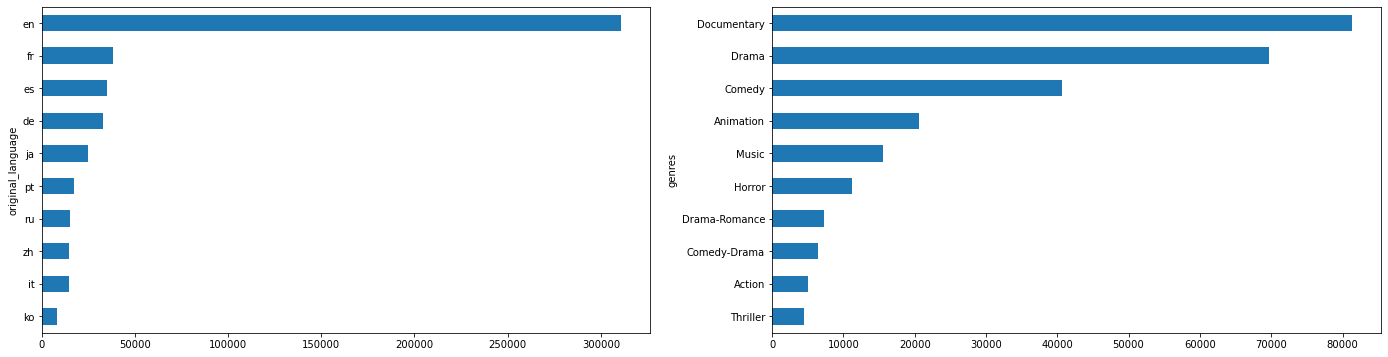

In [102]:
plt.figure(figsize = ((24, 6)))
plt.subplot(1, 2, 1)
df.groupby('original_language')['title'].count().sort_values(ascending = True).tail(10).plot.barh("Linguas")
plt.subplot(1, 2, 2)
df.groupby('genres')['title'].count().sort_values(ascending = True).tail(10).plot.barh("Gêneros")

In [103]:
df['data'] = pd.to_datetime(df['release_date']).dt.date
df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,data
0,436270,Black Adam,Action-Fantasy-Adventure,en,Nearly 5000 years after he was bestowed with t...,5132.631,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,5000000.0,...,Released,The world needed a hero. It got Black Adam.,7.326,298.0,Dwayne Johnson-Aldis Hodge-Pierce Brosnan-Quin...,anti hero-superhero-based on comic-dc extended...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,NaN,2022-10-19
1,616820,Halloween Ends,Horror-Thriller,en,Four years after the events of Halloween in 20...,4516.927,Miramax-Universal Pictures-Blumhouse Productio...,2022-10-12,20000000.0,63000000.0,...,Released,"This Halloween, their saga ends.",6.729,565.0,Jamie Lee Curtis-Andi Matichak-Rohan Campbell-...,trauma-halloween-sequel-serial killer-slasher-...,/3uDwqxbr0j34rJVJMOW6o8Upw5W.jpg,/aTovumsNlDjof7YVoU5nW2RHaYn.jpg,1010705-28543-35981-1015724-1031827-410113-772...,2022-10-12
2,760161,Orphan: First Kill,Horror-Thriller,en,After escaping from an Estonian psychiatric fa...,2872.213,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,9572765.0,...,Released,There's always been something wrong with Esther.,6.814,1054.0,Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...,psychopath-family secrets-prequel-murder-imper...,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,10065-421285-15737-985939-718930-84773-790-760...,2022-07-27
3,575322,Project Gemini,Science Fiction,en,After depleting Earth's resources for centurie...,2801.382,Kinodanz,2022-01-06,0.0,0.0,...,Released,Love over space,5.463,122.0,Egor Koreshkov-Alena Konstantinova-Katerina Sh...,NaN,/aVLV38txajXhEy2qNEClPIsDbAH.jpg,/etP5jwlwvkNhwe7jnI2AyA6ZKrR.jpg,429473-28295-773975-833425-723419-795109-92164...,2022-01-06
4,718930,Bullet Train,Action-Comedy-Thriller,en,Unlucky assassin Ladybug is determined to do h...,2654.547,Columbia Pictures-87North Productions,2022-07-03,90000000.0,238472534.0,...,Released,The end of the line is just the beginning.,7.514,1921.0,Brad Pitt-Joey King-Aaron Taylor-Johnson-Brian...,japan-assassin-based on novel or book-mission-...,/tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg,/83oeqwN64WtafGoITvsOzjKIQaM.jpg,760161-429473-843380-960170-421285-1027014-597...,2022-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741479,771936,El triste juego del amor,NaN,es,NaN,0.600,NaN,1993-01-01,0.0,0.0,...,Released,NaN,5.000,2.0,NaN,NaN,NaN,NaN,NaN,1993-01-01
741480,769605,Júrame,Drama,es,NaN,0.600,Nueva Films,1964-02-10,0.0,0.0,...,Released,NaN,0.000,0.0,José Calvo-Lina Canalejas-Juan Cortés-Félix Da...,NaN,/jINYskSzNh6jZEuD3tMyXzB2pGJ.jpg,NaN,NaN,1964-02-10
741481,837303,Martin Luther: His Life and Time,Drama,en,One reel survives.,0.600,Lutheran Film Division Inc.,1924-01-01,0.0,0.0,...,Released,NaN,0.000,0.0,NaN,NaN,/7Uy3nYJ5gzoVqW2Ei1woab3ic8Q.jpg,NaN,NaN,1924-01-01
741482,838418,Assini,Family-Drama,en,Assini is a rambunctious 7-year-old girl who d...,0.600,NaN,2015-08-15,0.0,0.0,...,Released,NaN,0.000,0.0,NaN,NaN,/q3cYv4rJlZrQLUg9Ae3F3z2elw9.jpg,NaN,NaN,2015-08-15


In [104]:
data_1 = date(2022,1,1)
data_2 = date(1980,1,1)
base_filmes = df.loc[df['data'] > data_2]
base_filmes2 = base_filmes.loc[base_filmes['data'] <= data_1]
base_filmes2

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,data
27,387844,Nice Sister-In-Law,Romance-Drama,ko,Ha-yeong is a successful psychologist. One day...,1211.301,NaN,2015-11-19,2000.0,8.000000e+03,...,Released,A man in love with his sister-in-law can't sto...,5.200,16.0,Kang Eun-hye-Kang Sung-pil-Lee Seung-chae-Mari...,softcore,/g462IXqa1Id9R1Xtu3EzqiEOGwN.jpg,/bRHSlon9z3gykN6CVePkIgbYSaZ.jpg,743814-733726-45479-58784-290098-41473-292777-...,2015-11-19
32,634649,Spider-Man: No Way Home,Action-Adventure-Science Fiction,en,Peter Parker is unmasked and no longer able to...,1073.395,Columbia Pictures-Marvel Studios-Pascal Pictures,2021-12-15,200000000.0,1.916051e+09,...,Released,The Multiverse unleashed.,8.031,15553.0,Tom Holland-Zendaya-Benedict Cumberbatch-Jacob...,new york city-loss of loved one-showdown-secre...,/uJYYizSuA9Y3DCs0qS4qWvHfZg4.jpg,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,453395-524434-414906-616037-566525-580489-3389...,2021-12-15
41,420634,Terrifier,Horror-Thriller,en,On Halloween night a young woman finds herself...,940.888,Dark Age Cinema,2016-10-15,100000.0,0.000000e+00,...,Released,There is nothing more frightening than a clown...,6.472,678.0,David Howard Thornton-Jenna Kanell-Samantha Sc...,clown-halloween-slasher-maniac-killer clown-ev...,/6PQqC4SbY910VvyVad6mvsboILU.jpg,/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg,231001-662389-663712-553645-361043-347751-3963...,2016-10-15
43,810693,Jujutsu Kaisen 0,Animation-Action-Fantasy,ja,Yuta Okkotsu is a nervous high school student ...,897.511,Toho-Shueisha-MBS-MAPPA-dugout-Sumzap,2021-12-24,0.0,1.615775e+08,...,Released,Fight what's within.,8.307,608.0,Megumi Ogata-Kana Hanazawa-Yuichi Nakamura-Tak...,exorcism-supernatural-horror-paranormal-curse-...,/3pTwMUEavTzVOh6yLN0aEwR7uSy.jpg,/geYUecpFI2AonDLhjyK9zoVFcMv.jpg,766507-610150-575249-667276-919355-648457-5855...,2021-12-24
46,667276,Legend Quest: The Origin,Animation-Comedy-Fantasy-Adventure-Family,es,When a human baby crosses the Eternal Mirror t...,804.960,Ánima Estudios,2021-02-15,0.0,0.000000e+00,...,Released,NaN,8.276,163.0,Bruno Bichir-Paola Ramones-Eduardo España-Mayt...,anime,/fR49hZdFJ6ZtRS23JW79VYmZgI7.jpg,/qpemGrOsri13KmvkYIeU8oJ1FQD.jpg,616037-978436-759175-1006851-585511-1000194-76...,2021-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741475,780094,Tři sestry – 25 let na Džbáně,Music,cs,NaN,0.600,NaN,2010-01-01,0.0,0.000000e+00,...,Released,NaN,0.000,0.0,Lou Fanánek Hagen,NaN,NaN,NaN,NaN,2010-01-01
741477,850996,DAWN: A Fan-Made Before the Storm Story,Drama-Romance,en,Chloe Price has never had it easy. When her fa...,0.600,NaN,2018-12-01,5000.0,0.000000e+00,...,Released,NaN,0.000,0.0,Payton Knight-Cassi McMullen,NaN,/uofPu6V6bynuu3Jivd66KvF6abp.jpg,NaN,NaN,2018-12-01
741479,771936,El triste juego del amor,NaN,es,NaN,0.600,NaN,1993-01-01,0.0,0.000000e+00,...,Released,NaN,5.000,2.0,NaN,NaN,NaN,NaN,NaN,1993-01-01
741482,838418,Assini,Family-Drama,en,Assini is a rambunctious 7-year-old girl who d...,0.600,NaN,2015-08-15,0.0,0.000000e+00,...,Released,NaN,0.000,0.0,NaN,NaN,/q3cYv4rJlZrQLUg9Ae3F3z2elw9.jpg,NaN,NaN,2015-08-15


In [106]:
base_filmes2.groupby('data')['title'].count()

data
1980-01-02     68
1980-01-03      5
1980-01-04      8
1980-01-05      2
1980-01-06      6
             ... 
2021-12-28     35
2021-12-29     32
2021-12-30     61
2021-12-31    487
2022-01-01    152
Name: title, Length: 15307, dtype: int64

In [109]:
base_filmes2.groupby("original_language")['title'].count().sort_values(ascending = False).head(10)

original_language
en    237676
fr     27565
es     26592
de     21026
ja     18776
pt     14600
zh     12053
ru     10529
it      9301
ko      7270
Name: title, dtype: int64

<AxesSubplot:ylabel='original_language'>

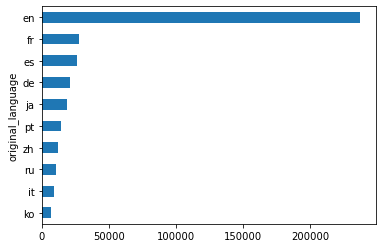

In [108]:
base_filmes2.groupby("original_language")['title'].count().sort_values(ascending = True).tail(10).plot.barh()

In [110]:
base_filmes3 = base_filmes2.loc[((base_filmes2.original_language == 'en') | (base_filmes2.original_language == 'fr') | (base_filmes2.original_language == 'es') | (base_filmes2.original_language == 'de') | (base_filmes2.original_language == 'ja') | (base_filmes2.original_language == 'pt') | (base_filmes2.original_language == 'zh') | (base_filmes2.original_language == 'ru') | (base_filmes2.original_language == 'it') | (base_filmes2.original_language == 'ko'))]

In [111]:
base_filmes3.shape

(385388, 21)

In [112]:
base_filmes3.groupby("original_language")['title'].count().sort_values(ascending = True)

original_language
ko      7270
it      9301
ru     10529
zh     12053
pt     14600
ja     18776
de     21026
es     26592
fr     27565
en    237676
Name: title, dtype: int64

In [114]:
base_filmes3.groupby('data')['title'].count()

data
1980-01-02     51
1980-01-03      4
1980-01-04      7
1980-01-05      2
1980-01-06      4
             ... 
2021-12-28     31
2021-12-29     26
2021-12-30     48
2021-12-31    438
2022-01-01    124
Name: title, Length: 15266, dtype: int64

In [115]:
base_filmes3.groupby('genres')['title'].count().sort_values(ascending = False).head(25)

genres
Documentary            60580
Drama                  34758
Comedy                 19614
Music                  13363
Animation              11092
Horror                  8956
Comedy-Drama            3740
Drama-Romance           3417
Thriller                3212
Action                  3207
Documentary-Music       2852
Drama-Comedy            2453
Romance                 2406
Comedy-Romance          2013
Science Fiction         1753
Music-Documentary       1710
Horror-Thriller         1663
Drama-Thriller          1640
Documentary-History     1625
Romance-Drama           1537
Drama-TV Movie          1446
Family                  1288
Crime                   1194
Action-Drama            1150
Comedy-Horror           1088
Name: title, dtype: int64

In [116]:
base_filmes4 = base_filmes3.loc[((base_filmes3.genres == 'Drama') | (base_filmes3.genres == 'Comedy') | (base_filmes3.genres == 'Animation') | (base_filmes3.genres == 'Horror') | (base_filmes3.genres == 'Comedy-Drama') | (base_filmes3.genres == 'Thriller') | (base_filmes3.genres == 'Action') | (base_filmes3.genres == 'Drama-Romance') | (base_filmes3.genres == 'Romance') | (base_filmes3.genres == 'Comedy-Romance') | (base_filmes3.genres == 'Science Fiction') | (base_filmes3.genres == 'Family') | (base_filmes3.genres == 'Crime') | (base_filmes3.genres == 'Comedy-Horror') | (base_filmes3.genres == 'Animation-Family') | (base_filmes3.genres == 'Drama-Thriller') | (base_filmes3.genres == 'Horror-Thriller') | (base_filmes3.genres == 'Crime-Drama') | (base_filmes3.genres == 'Comedy-Drama-Romance') | (base_filmes3.genres == 'Fantasy') | (base_filmes3.genres == 'Animation-Comedy') | (base_filmes3.genres == 'Drama-Family') | (base_filmes3.genres == 'Adventure'))]

In [117]:
base_filmes4.groupby('genres')['title'].count()

genres
Action                   3207
Adventure                 429
Animation               11092
Animation-Comedy          845
Animation-Family         1084
Comedy                  19614
Comedy-Drama             3740
Comedy-Drama-Romance      916
Comedy-Horror            1088
Comedy-Romance           2013
Crime                    1194
Crime-Drama               884
Drama                   34758
Drama-Family              827
Drama-Romance            3417
Drama-Thriller           1640
Family                   1288
Fantasy                   874
Horror                   8956
Horror-Thriller          1663
Romance                  2406
Science Fiction          1753
Thriller                 3212
Name: title, dtype: int64

In [118]:
base_filmes4.sample()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,data
25558,694940,Sincheon Station Exit 3,Drama-Romance,ko,Min-ji who just turned 20 lives on the street ...,6.744,NaN,2020-04-02,0.0,0.0,...,Released,NaN,10.0,1.0,Lee Sul-ah-I-Ahn So-hee-Min Do-yoon-Si Woo-Hae Il,softcore,/1XnaXxxhrQkiACl2hvVqgWrYobS.jpg,/hBpYa3IFUXZnIp34eGAmqKklVMd.jpg,NaN,2020-04-02
